<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/test_of_CNN%2BRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns


print(os.listdir("/content/drive/MyDrive/Carrots-Diff/"))

SIZE = 128

train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Carrots-Diff/Train/*"):
    label = directory_path.split("\\")[-1]
    label=str(label)

    print(label ,' hh ')
    print(directory_path)
    for img_path in glob.glob(os.path.join(directory_path, "*")):
      # if directory_path=="/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/" :
          print(img_path)
          img = cv2.imread(img_path, cv2.IMREAD_COLOR)
          try:
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            train_images.append(img)
            train_labels.append(label)
          except:
            pass
          # break

train_images = np.array(train_images)
train_labels = np.array(train_labels)


# test


#Encode labels from text to integers.


['Validate', 'Train', 'Test']
/content/drive/MyDrive/Carrots-Diff/Train/Healthy  hh 
/content/drive/MyDrive/Carrots-Diff/Train/Healthy
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/1.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/2.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/3.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/4.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/5.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/6.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/7.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/8.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/9.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/10.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/11.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/12.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/13.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/14.jpg
/content/drive/MyDrive/Carrots-Diff/Train/Healthy/15.jpg
/content/drive/MyDr

In [ ]:

test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Carrots-Diff/Validate/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/76.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/77.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/78.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/81.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/84.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/85.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/86.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/88.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/91.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/92.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/93.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/94.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/90.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/89.JPG
/content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack/79.JPG
/content/drive/MyDrive/Ca

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(test_labels)
# test_labels_encoded = le.transform(test_labels)
# le.fit(train_labels)
# train_labels_encoded = le.transform(train_labels)
# print(test_labels_encoded )

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:

print(y_test.shape)
print(x_test.shape)
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#One hot encode y values for neural network.
# from keras.utils import to_categorical
# from tensorflow.keras.utils import to_categorical

# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

(76,)
(76, 128, 128, 3)


In [ ]:

activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())


In [ ]:
# model = Sequential()
# model.add(Conv2D(input_shape=(300,300,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



# model.add(Flatten())
# # model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=4096,activation="relu"))
# # model.add(Dense(units=6, activation="softmax"))

In [ ]:
x = feature_extractor.output
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496 

In [ ]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot))

Epoch 1/5
10/10 [==============================] - 48s 180ms/step - loss: 2.2809 - accuracy: 0.3182 - val_loss: 2.1236 - val_accuracy: 0.2500
Epoch 2/5
10/10 [==============================] - 0s 50ms/step - loss: 1.1371 - accuracy: 0.5343 - val_loss: 1.7820 - val_accuracy: 0.2500
Epoch 3/5
10/10 [==============================] - 1s 52ms/step - loss: 1.0586 - accuracy: 0.5248 - val_loss: 1.8390 - val_accuracy: 0.2500
Epoch 4/5
10/10 [==============================] - 1s 51ms/step - loss: 0.9522 - accuracy: 0.6013 - val_loss: 1.8533 - val_accuracy: 0.2500
Epoch 5/5
10/10 [==============================] - 1s 51ms/step - loss: 0.8607 - accuracy: 0.6699 - val_loss: 2.0734 - val_accuracy: 0.2500


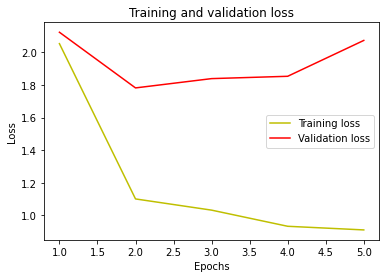

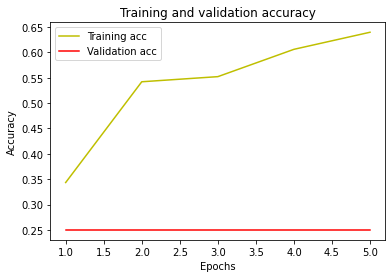

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[ 0  0  0  0  0]
 [19  0  0  0  0]
 [19  0  0  0  0]
 [19  0  0  0  0]
 [19  0  0  0  0]]


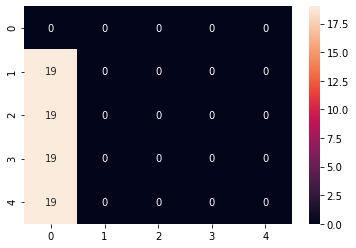

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)


The prediction for this image is:  ['/content/drive/MyDrive/Carrots-Diff/Train/Root_knot']
The actual label for this image is:  /content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack


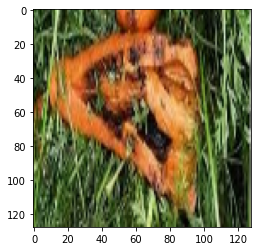

In [ ]:
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF
print(X_for_RF.shape)

(297, 65536)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)


In [ ]:
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.0


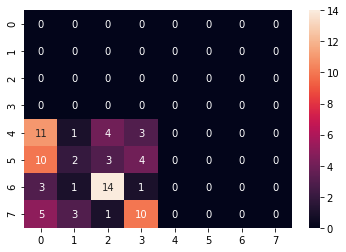

In [ ]:
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['/content/drive/MyDrive/Carrots-Diff/Train/Growth_crack']
The actual label for this image is:  /content/drive/MyDrive/Carrots-Diff/Validate/Growth_crack


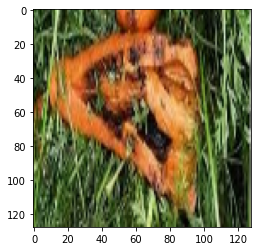

In [ ]:
n=9 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,

                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (300, 300))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 32,
                                                          class_mode  = 'categorical',
                                                         shuffle=False ,
                                                          target_size = (300, 300) )

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')

In [ ]:
# history = model.fit(
#             train_generator,
#             validation_data = validation_generator,
#             steps_per_epoch = len(train_generator),
#             epochs = 110,
#             callbacks=[checkpoint],
#             validation_steps = len(validation_generator),
#             verbose = 2)


X_for_RF = model.predict(x_train) #This is out X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
history =RF_model.fit(train_generator, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
model.load_weights('best_model.h5')
scores = model.evaluate_generator(generator=validation_generator, steps=validation_generator.n //20+1)
print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(validation_generator, steps=validation_generator.n // 20+ 1)

y_pred = np.argmax(Y_pred, axis=1)
print()

print('Confusion Matrix')
target_names = list(validation_generator.class_indices.keys())
print(target_names)
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))